In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
data = pd.read_csv("upload the csv file")

In [4]:
# set the maximum number of columns to display
pd.options.display.max_columns = None

# set the maximum number of rows to display
pd.options.display.max_rows = None

In [5]:
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [6]:
data.tail()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667
6434,45,26-10-2012,760281.43,0,58.85,3.882,192.308899,8.667


In [7]:
data.shape

(6435, 8)

In [8]:

data.dtypes

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [10]:
data.nunique()

Store             45
Date             143
Weekly_Sales    6435
Holiday_Flag       2
Temperature     3528
Fuel_Price       892
CPI             2145
Unemployment     349
dtype: int64

In [11]:

data.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [12]:
data.duplicated().sum()

0

In [13]:
data[ ['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment'] ].describe()

,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment
count,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000
mean,1.046965e+06,60.663782,3.358607,171.578394,7.999151
std,5.643666e+05,18.444933,0.459020,39.356712,1.875885
min,2.099862e+05,-2.060000,2.472000,126.064000,3.879000
25%,5.533501e+05,47.460000,2.933000,131.735000,6.891000
50%,9.607460e+05,62.670000,3.445000,182.616521,7.874000
75%,1.420159e+06,74.940000,3.735000,212.743293,8.622000
max,3.818686e+06,100.140000,4.468000,227.232807,14.313000


In [14]:
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')

In [15]:
data['Holiday_Flag'] = pd.Categorical(data['Holiday_Flag'])

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   category      
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: category(1), datetime64[ns](1), float64(5), int64(1)
memory usage: 358.4 KB


In [17]:
data.head(10)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106
5,1,2010-03-12,1439541.59,0,57.79,2.667,211.380643,8.106
6,1,2010-03-19,1472515.79,0,54.58,2.720,211.215635,8.106
7,1,2010-03-26,1404429.92,0,51.45,2.732,211.018042,8.106
8,1,2010-04-02,1594968.28,0,62.27,2.719,210.820450,7.808
9,1,2010-04-09,1545418.53,0,65.86,2.770,210.622857,7.808


In [18]:
data.tail(10)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
6425,45,2012-08-24,718232.26,0,72.62,3.834,191.344887,8.684
6426,45,2012-08-31,734297.87,0,75.09,3.867,191.461281,8.684
6427,45,2012-09-07,766512.66,1,75.70,3.911,191.577676,8.684
6428,45,2012-09-14,702238.27,0,67.87,3.948,191.699850,8.684
6429,45,2012-09-21,723086.20,0,65.32,4.038,191.856704,8.684
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667
6434,45,2012-10-26,760281.43,0,58.85,3.882,192.308899,8.667


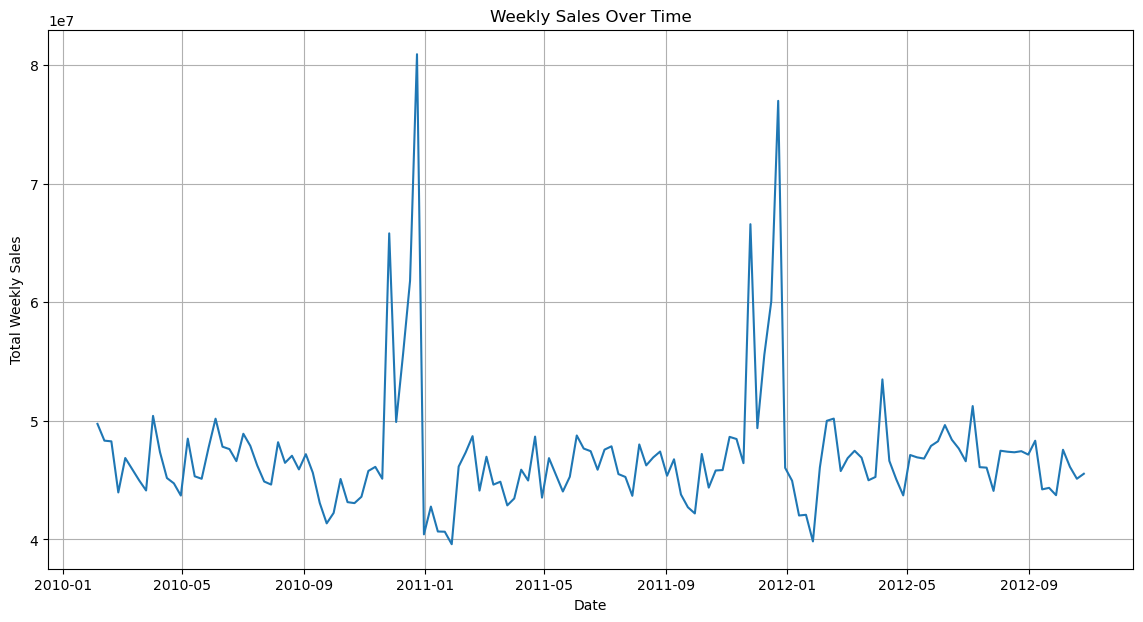

In [19]:
plt.figure(figsize=(14, 7))
plt.plot(data.groupby('Date')['Weekly_Sales'].sum())
plt.title('Weekly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Weekly Sales')
plt.grid(True)
plt.show()

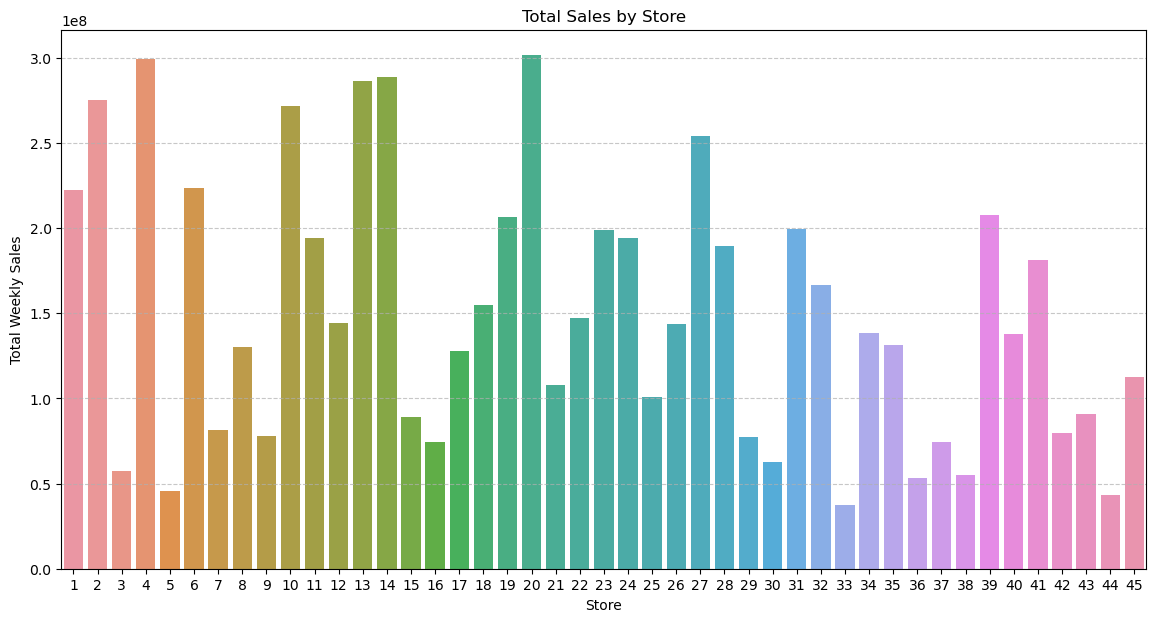

In [20]:
store_sales = data.groupby('Store')['Weekly_Sales'].sum().reset_index()

plt.figure(figsize=(14, 7))
sns.barplot(x='Store', y='Weekly_Sales', data=store_sales)
plt.title('Total Sales by Store')
plt.xlabel('Store')
plt.ylabel('Total Weekly Sales')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

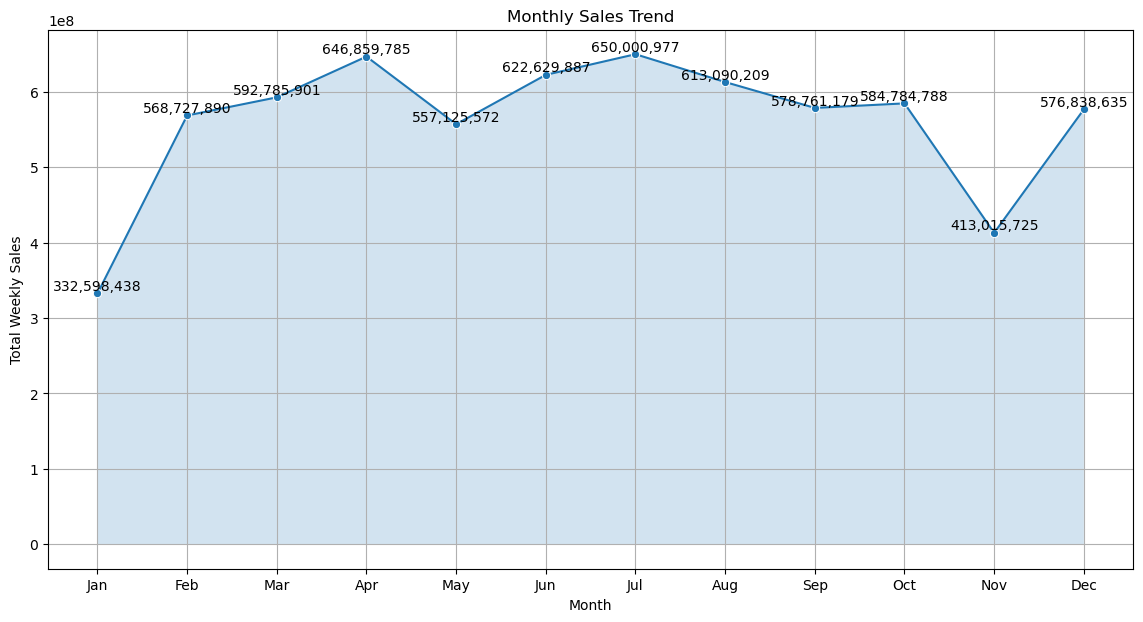

In [21]:
data['Month'] = data['Date'].dt.month
monthly_sales = data.groupby('Month')['Weekly_Sales'].sum().reset_index()

# plot
plt.figure(figsize=(14, 7))
sns.lineplot(x='Month', y='Weekly_Sales', data=monthly_sales, marker='o')
plt.fill_between(monthly_sales['Month'], monthly_sales['Weekly_Sales'], alpha=0.2)

# annotate peaks
for month, sales in monthly_sales.values:
    plt.text(month, sales, f'{sales:,.0f}', ha='center', va='bottom')

# set x-axis labels to month names
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(ticks=range(1, 13), labels=month_names)

plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Weekly Sales')
plt.grid(True)
plt.show()

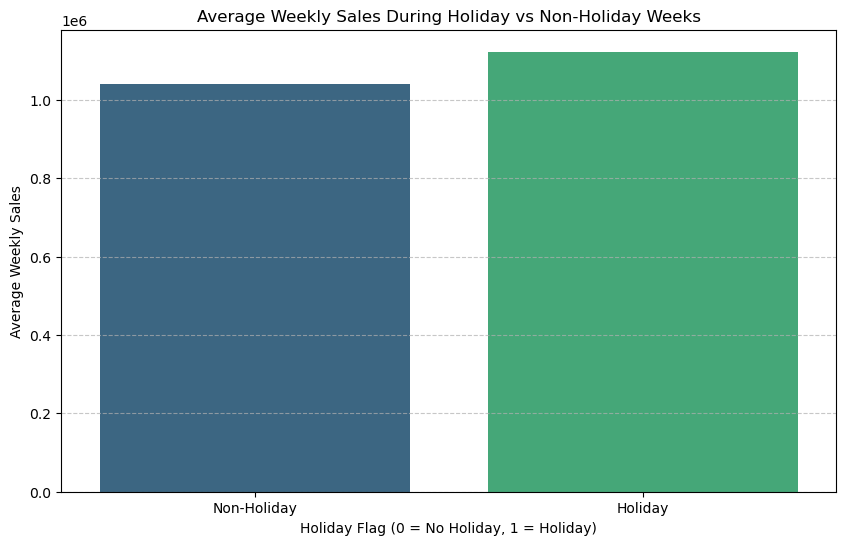

In [22]:
holiday_sales = data.groupby('Holiday_Flag')['Weekly_Sales'].mean().reset_index()
holiday_sales.columns = ['Holiday_Flag', 'Average_Weekly_Sales']

# plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Holiday_Flag', y='Average_Weekly_Sales', data=holiday_sales, palette='viridis')
plt.title('Average Weekly Sales During Holiday vs Non-Holiday Weeks')
plt.xlabel('Holiday Flag (0 = No Holiday, 1 = Holiday)')
plt.ylabel('Average Weekly Sales')
plt.xticks([0, 1], ['Non-Holiday', 'Holiday'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

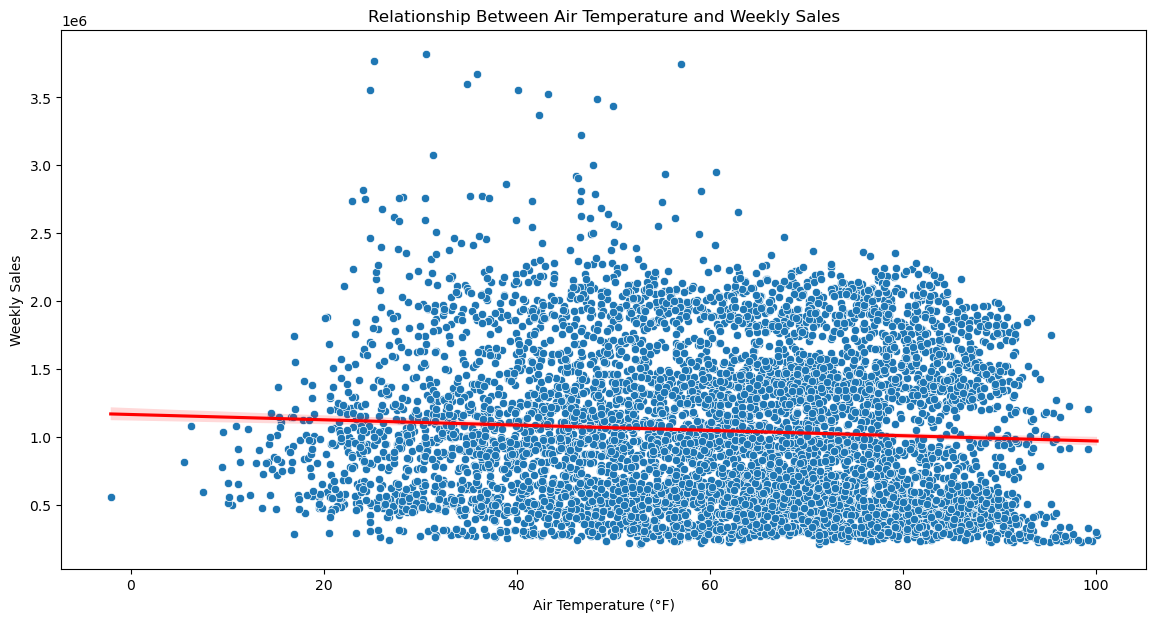

In [23]:
plt.figure(figsize=(14, 7))
sns.scatterplot(x='Temperature', y='Weekly_Sales', data=data)
sns.regplot(x='Temperature', y='Weekly_Sales', data=data, scatter=False, color='red')
plt.title('Relationship Between Air Temperature and Weekly Sales')
plt.xlabel('Air Temperature (°F)')
plt.ylabel('Weekly Sales')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


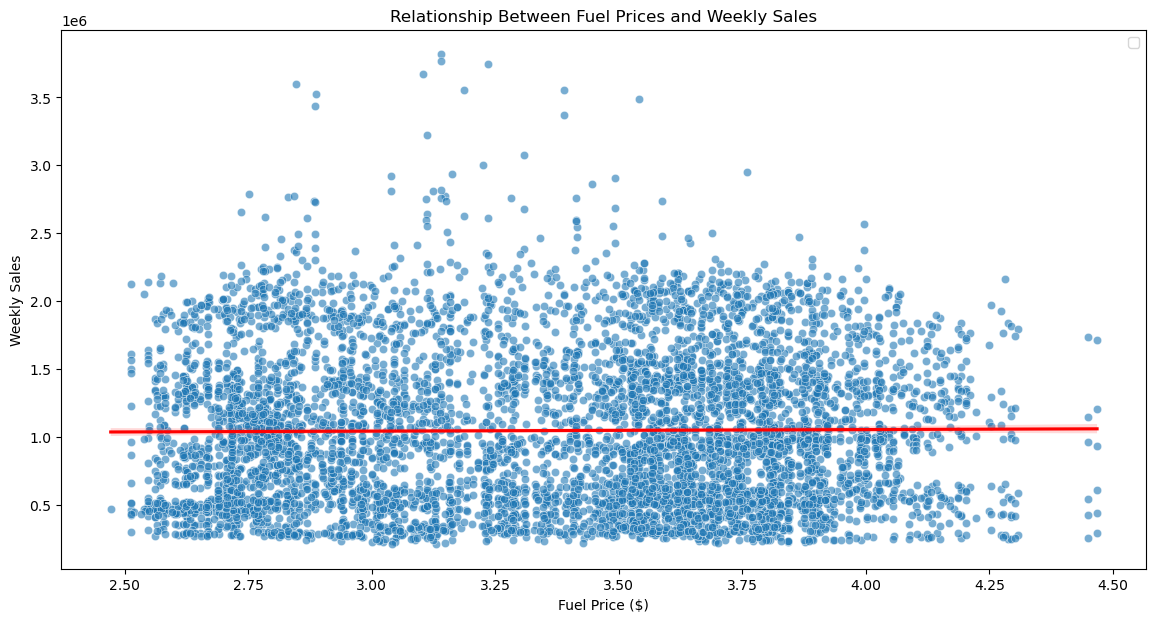

In [24]:
plt.figure(figsize=(14, 7))
sns.scatterplot(x='Fuel_Price', y='Weekly_Sales', data=data, alpha=0.6)
sns.regplot(x='Fuel_Price', y='Weekly_Sales', data=data, scatter=False, color='red', line_kws={'label':'Trend Line'})
plt.title('Relationship Between Fuel Prices and Weekly Sales')
plt.xlabel('Fuel Price ($)')
plt.ylabel('Weekly Sales')
plt.legend()
plt.show()

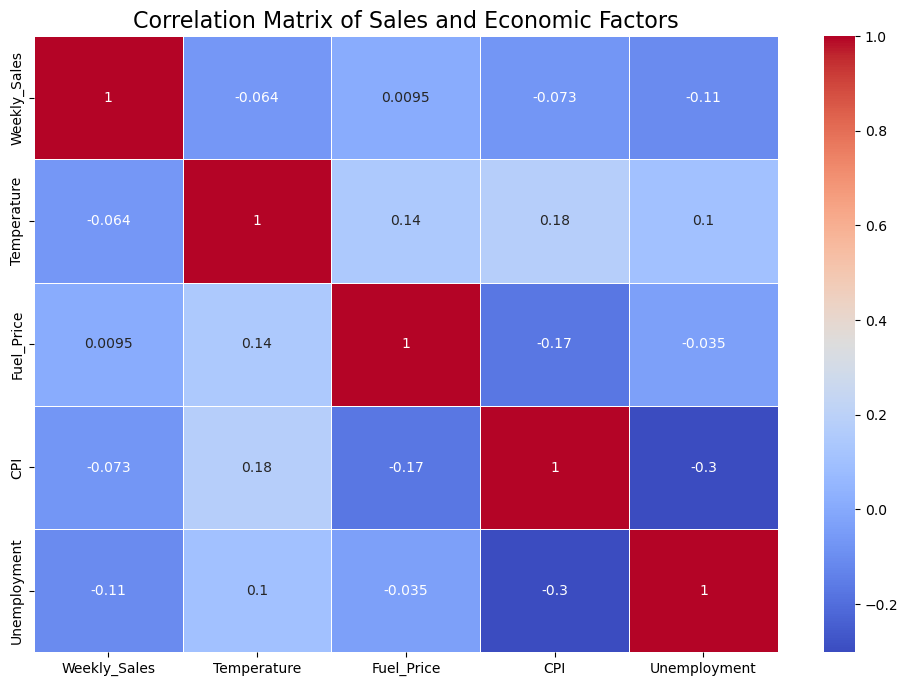

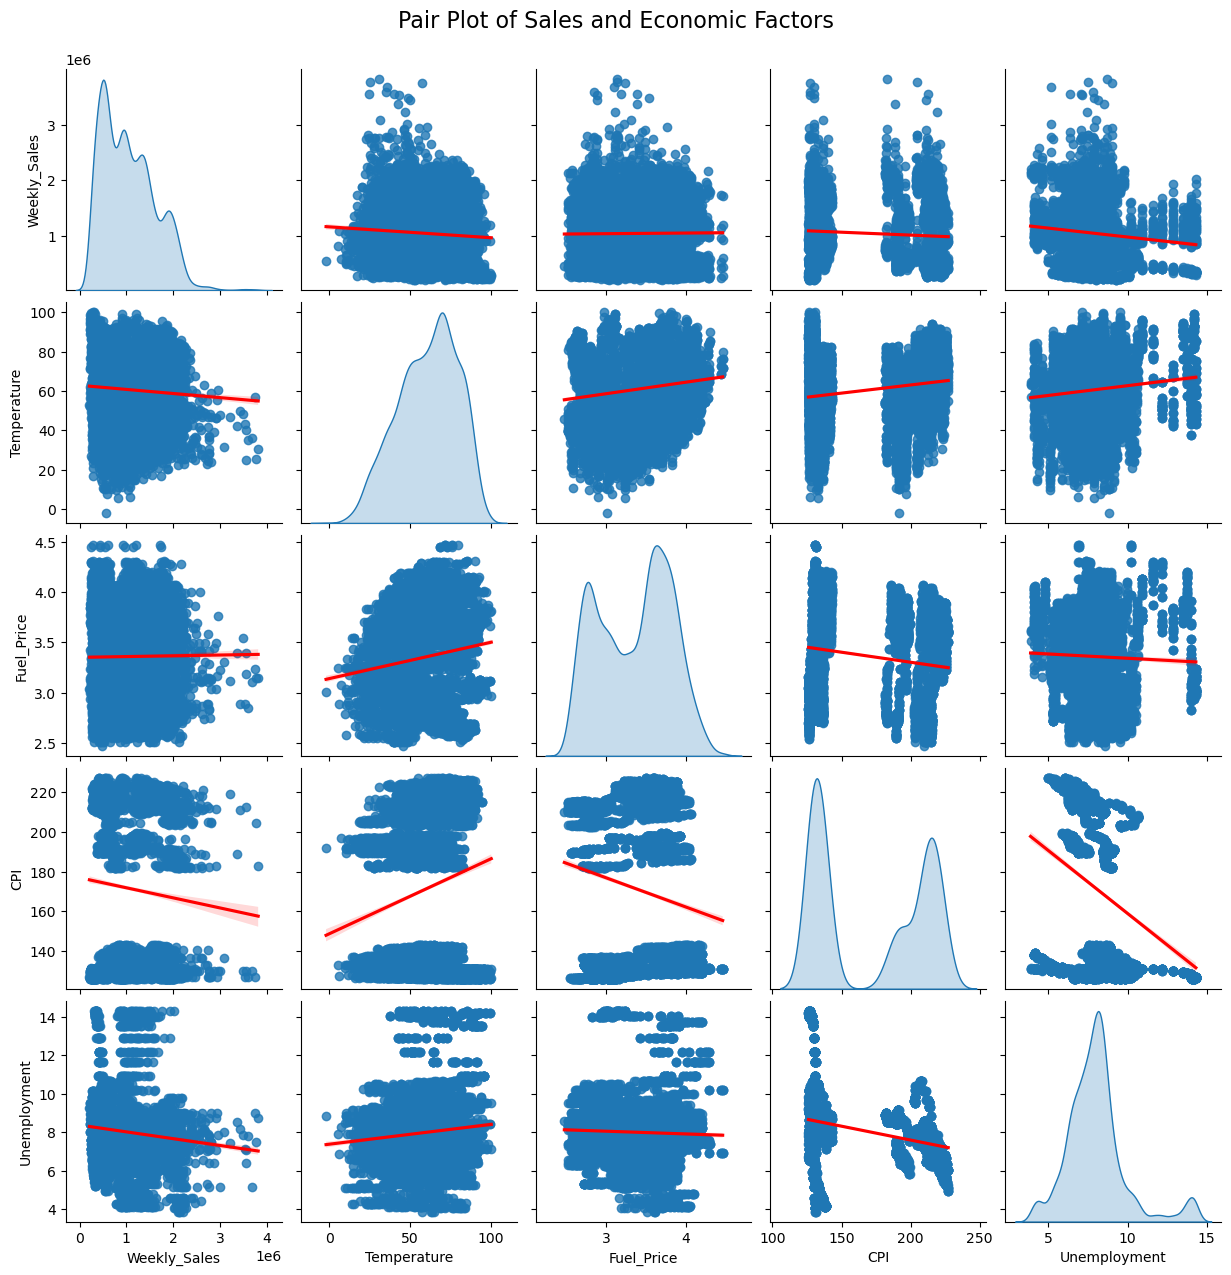

In [25]:
# Calculate the correlation matrix
correlation_matrix = data[['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']].corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Sales and Economic Factors', fontsize=16)
plt.show()

# Plot pair plot to visualize the relationships
sns.pairplot(data[['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']], diag_kind='kde', kind='reg', plot_kws={'line_kws':{'color':'red'}})
plt.suptitle('Pair Plot of Sales and Economic Factors', fontsize=16, y=1.02)
plt.show()